### Interpreting Breast Cancer Prediction(Benign or Malignant) with Shap,LIME
+ SHAP(SHapley Additive exPlanations) :break down a prediction to show the impact of each feature.

In [3]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [4]:
# Load ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

In [5]:
# Load Viz Pkgs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Labels For Columns/Header
   ####  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

In [6]:
names =  ["Code_number", "Clump_Thickness", "Uniform_Cell_Size", "Uniform_Cell_Shape ", "Marginal_Adhesion ", "Single_Epithelial_Cell_Size", "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli", "Mitoses", "Class"]

In [7]:
# Load Dataset
df = pd.read_csv("breast-cancer-wisconsin.csv",names=names)

In [8]:
df.head()

Code_number  Clump_Thickness  Uniform_Cell_Size  Uniform_Cell_Shape   \
0      1000025                5                  1                    1   
1      1002945                5                  4                    4   
2      1015425                3                  1                    1   
3      1016277                6                  8                    8   
4      1017023                4                  1                    1   

   Marginal_Adhesion   Single_Epithelial_Cell_Size Bare_Nuclei  \
0                   1                            2           1   
1                   5                            7          10   
2                   1                            2           2   
3                   1                            3           4   
4                   3                            2           1   

   Bland_Chromatin  Normal_Nucleoli  Mitoses  Class  
0                3                1        1      2  
1                3                2        1      2  
2                3                1        1      2  
3                3                7        1      2  
4                3                1        1      2

In [9]:
# Size
df.shape

(699, 11)

In [10]:
# Check For Missing Values
df.isna().sum()

Code_number                    0
Clump_Thickness                0
Uniform_Cell_Size              0
Uniform_Cell_Shape             0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [11]:
import missingno as no

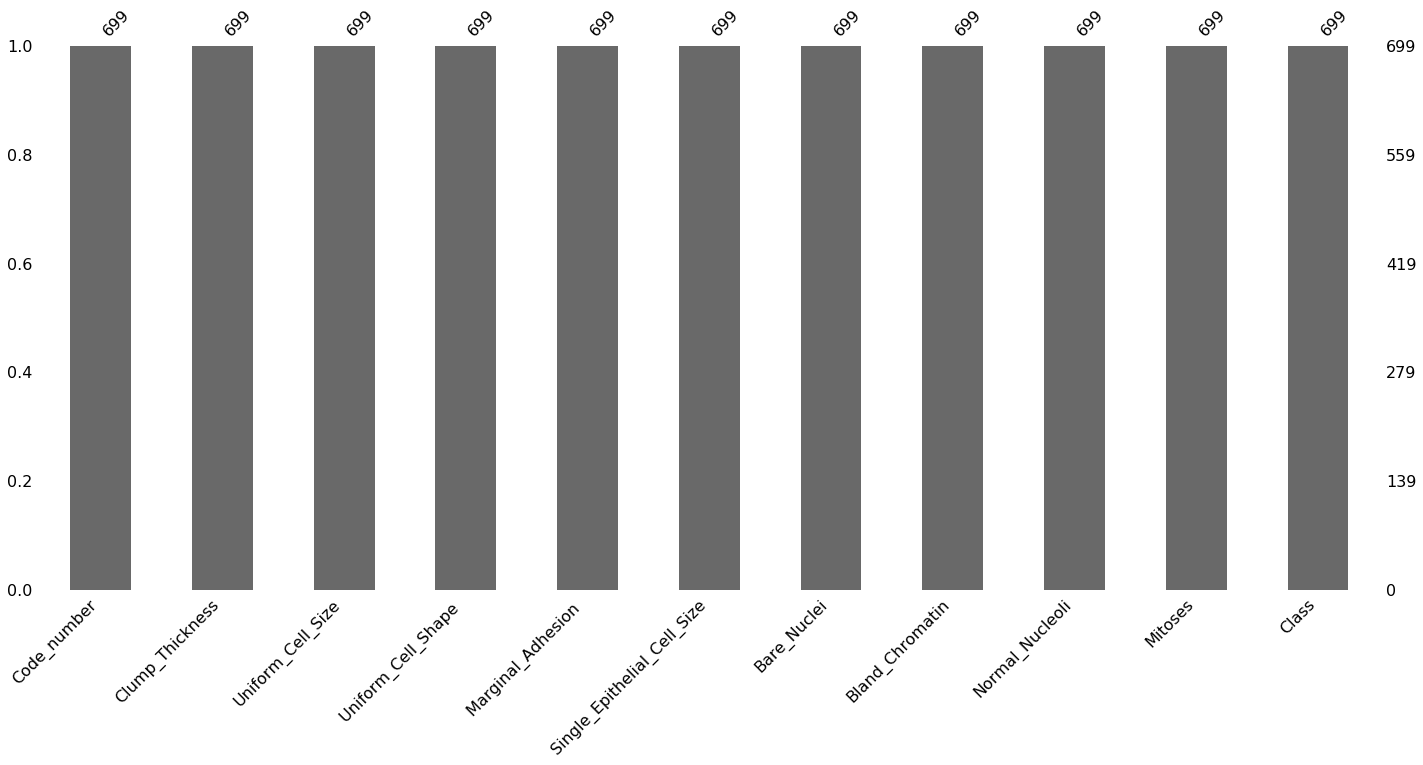

In [12]:
no.bar(df)

In [13]:
# Data Types
df.dtypes

Code_number                     int64
Clump_Thickness                 int64
Uniform_Cell_Size               int64
Uniform_Cell_Shape              int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Bland_Chromatin                 int64
Normal_Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [14]:
# Check For Occurence of Class
df.groupby('Class').size()

Class
2    458
4    241
dtype: int64

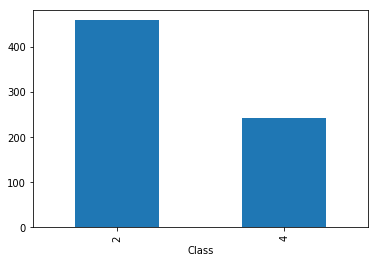

In [15]:
#Bar Plot
df.groupby('Class').size().plot(kind='bar')

In [16]:
# Check For Correlation Between Xtics/Features
corr = df.corr()

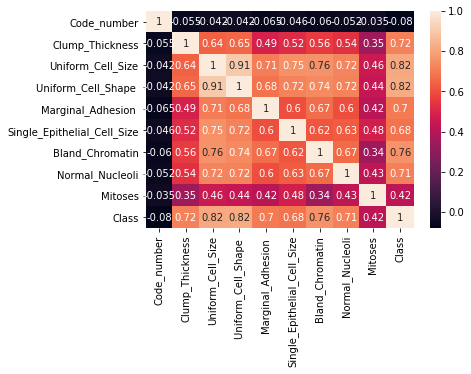

In [17]:
# HeatMap
sns.heatmap(corr,annot=True)

### Narrative
+ Fig 1 : There are more patients with benign(2) breast cancer than with malignant(4)
+ Fig 2: Correlation of various xtics    

#### Data Viz of Entire Dataset

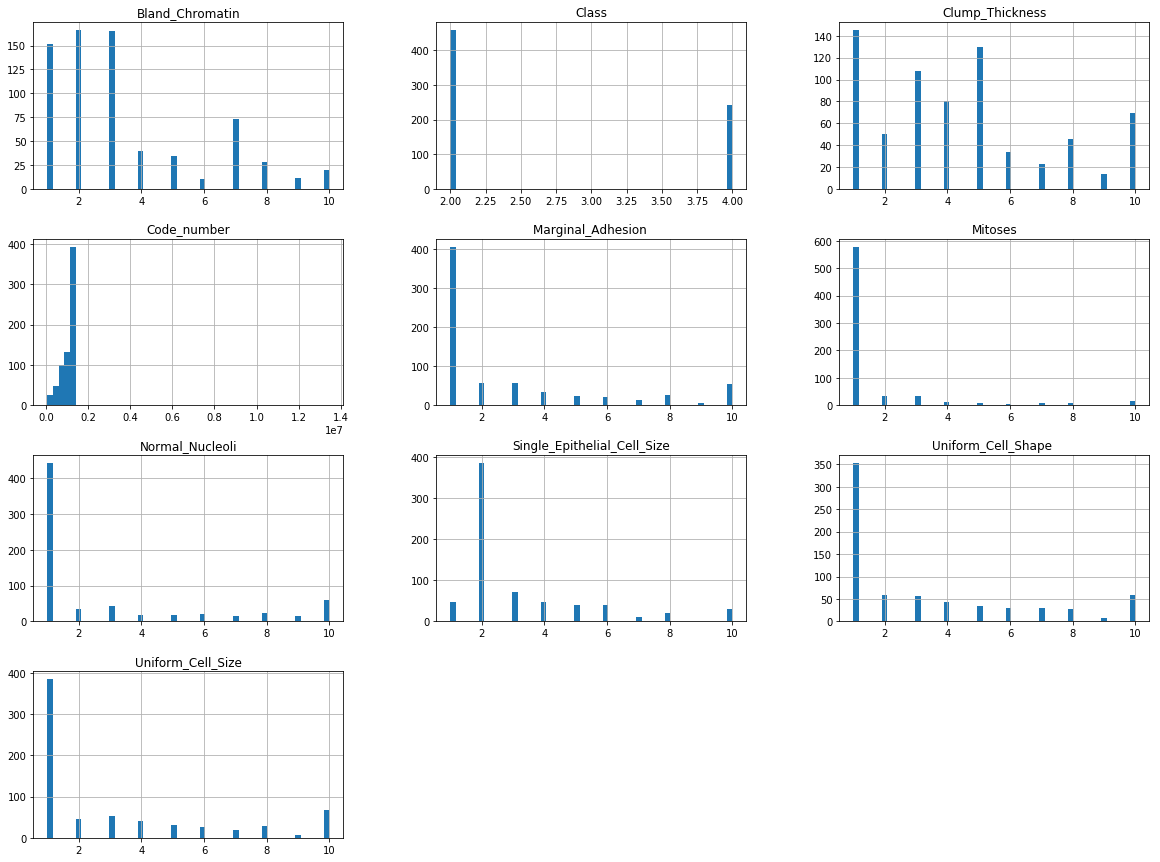

In [18]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [19]:
# Descriptive Analysis Transposed
df.describe()

Code_number  Clump_Thickness  Uniform_Cell_Size  Uniform_Cell_Shape   \
count  6.990000e+02       699.000000         699.000000           699.000000   
mean   1.071704e+06         4.417740           3.134478             3.207439   
std    6.170957e+05         2.815741           3.051459             2.971913   
min    6.163400e+04         1.000000           1.000000             1.000000   
25%    8.706885e+05         2.000000           1.000000             1.000000   
50%    1.171710e+06         4.000000           1.000000             1.000000   
75%    1.238298e+06         6.000000           5.000000             5.000000   
max    1.345435e+07        10.000000          10.000000            10.000000   

       Marginal_Adhesion   Single_Epithelial_Cell_Size  Bland_Chromatin  \
count          699.000000                   699.000000       699.000000   
mean             2.806867                     3.216023         3.437768   
std              2.855379                     2.214300         2.438364   
min              1.000000                     1.000000         1.000000   
25%              1.000000                     2.000000         2.000000   
50%              1.000000                     2.000000         3.000000   
75%              4.000000                     4.000000         5.000000   
max             10.000000                    10.000000        10.000000   

       Normal_Nucleoli     Mitoses       Class  
count       699.000000  699.000000  699.000000  
mean          2.866953    1.589413    2.689557  
std           3.053634    1.715078    0.951273  
min           1.000000    1.000000    2.000000  
25%           1.000000    1.000000    2.000000  
50%           1.000000    1.000000    2.000000  
75%           4.000000    1.000000    4.000000  
max          10.000000   10.000000    4.000000

In [20]:
df.describe().T

count          mean            std      min  \
Code_number                  699.0  1.071704e+06  617095.729819  61634.0   
Clump_Thickness              699.0  4.417740e+00       2.815741      1.0   
Uniform_Cell_Size            699.0  3.134478e+00       3.051459      1.0   
Uniform_Cell_Shape           699.0  3.207439e+00       2.971913      1.0   
Marginal_Adhesion            699.0  2.806867e+00       2.855379      1.0   
Single_Epithelial_Cell_Size  699.0  3.216023e+00       2.214300      1.0   
Bland_Chromatin              699.0  3.437768e+00       2.438364      1.0   
Normal_Nucleoli              699.0  2.866953e+00       3.053634      1.0   
Mitoses                      699.0  1.589413e+00       1.715078      1.0   
Class                        699.0  2.689557e+00       0.951273      2.0   

                                  25%        50%        75%         max  
Code_number                  870688.5  1171710.0  1238298.0  13454352.0  
Clump_Thickness                   2.0        4.0        6.0        10.0  
Uniform_Cell_Size                 1.0        1.0        5.0        10.0  
Uniform_Cell_Shape                1.0        1.0        5.0        10.0  
Marginal_Adhesion                 1.0        1.0        4.0        10.0  
Single_Epithelial_Cell_Size       2.0        2.0        4.0        10.0  
Bland_Chromatin                   2.0        3.0        5.0        10.0  
Normal_Nucleoli                   1.0        1.0        4.0        10.0  
Mitoses                           1.0        1.0        1.0        10.0  
Class                             2.0        2.0        4.0         4.0

In [21]:
df['Bare_Nuclei'].dtype

dtype('O')

In [31]:

df[df['Bare_Nuclei'] == '?']

Code_number  Clump_Thickness  Uniform_Cell_Size  Uniform_Cell_Shape   \
23       1057013                8                  4                    5   
40       1096800                6                  6                    6   
139      1183246                1                  1                    1   
145      1184840                1                  1                    3   
158      1193683                1                  1                    2   
164      1197510                5                  1                    1   
235      1241232                3                  1                    4   
249       169356                3                  1                    1   
275       432809                3                  1                    3   
292       563649                8                  8                    8   
294       606140                1                  1                    1   
297        61634                5                  4                    3   
315       704168                4                  6                    5   
321       733639                3                  1                    1   
411      1238464                1                  1                    1   
617      1057067                1                  1                    1   

     Marginal_Adhesion   Single_Epithelial_Cell_Size Bare_Nuclei  \
23                    1                            2           ?   
40                    9                            6           ?   
139                   1                            1           ?   
145                   1                            2           ?   
158                   1                            3           ?   
164                   1                            2           ?   
235                   1                            2           ?   
249                   1                            2           ?   
275                   1                            2           ?   
292                   1                            2           ?   
294                   1                            2           ?   
297                   1                            2           ?   
315                   6                            7           ?   
321                   1                            2           ?   
411                   1                            1           ?   
617                   1                            1           ?   

     Bland_Chromatin  Normal_Nucleoli  Mitoses  Class  
23                 7                3        1      4  
40                 7                8        1      2  
139                2                1        1      2  
145                2                1        1      2  
158                1                1        1      2  
164                3                1        1      2  
235                3                1        1      2  
249                3                1        1      2  
275                2                1        1      2  
292                6               10        1      4  
294                2                1        1      2  
297                2                3        1      2  
315                4                9        1      2  
321                3                1        1      2  
411                2                1        1      2  
617                1                1        1      2

In [36]:
df['Bare_Nuclei'] = df['Bare_Nuclei'].replace(to_replace='?',value=0)

In [42]:
df['Bare_Nuclei'] = df['Bare_Nuclei'].astype(int)
# df['Bare_Nuclei'].apply(pd.to_numeric)

In [43]:
df.dtypes

Code_number                    int64
Clump_Thickness                int64
Uniform_Cell_Size              int64
Uniform_Cell_Shape             int64
Marginal_Adhesion              int64
Single_Epithelial_Cell_Size    int64
Bare_Nuclei                    int64
Bland_Chromatin                int64
Normal_Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [44]:
df.describe().T

count          mean            std      min  \
Code_number                  699.0  1.071704e+06  617095.729819  61634.0   
Clump_Thickness              699.0  4.417740e+00       2.815741      1.0   
Uniform_Cell_Size            699.0  3.134478e+00       3.051459      1.0   
Uniform_Cell_Shape           699.0  3.207439e+00       2.971913      1.0   
Marginal_Adhesion            699.0  2.806867e+00       2.855379      1.0   
Single_Epithelial_Cell_Size  699.0  3.216023e+00       2.214300      1.0   
Bare_Nuclei                  699.0  3.463519e+00       3.640708      0.0   
Bland_Chromatin              699.0  3.437768e+00       2.438364      1.0   
Normal_Nucleoli              699.0  2.866953e+00       3.053634      1.0   
Mitoses                      699.0  1.589413e+00       1.715078      1.0   
Class                        699.0  2.689557e+00       0.951273      2.0   

                                  25%        50%        75%         max  
Code_number                  870688.5  1171710.0  1238298.0  13454352.0  
Clump_Thickness                   2.0        4.0        6.0        10.0  
Uniform_Cell_Size                 1.0        1.0        5.0        10.0  
Uniform_Cell_Shape                1.0        1.0        5.0        10.0  
Marginal_Adhesion                 1.0        1.0        4.0        10.0  
Single_Epithelial_Cell_Size       2.0        2.0        4.0        10.0  
Bare_Nuclei                       1.0        1.0        5.0        10.0  
Bland_Chromatin                   2.0        3.0        5.0        10.0  
Normal_Nucleoli                   1.0        1.0        4.0        10.0  
Mitoses                           1.0        1.0        1.0        10.0  
Class                             2.0        2.0        4.0         4.0

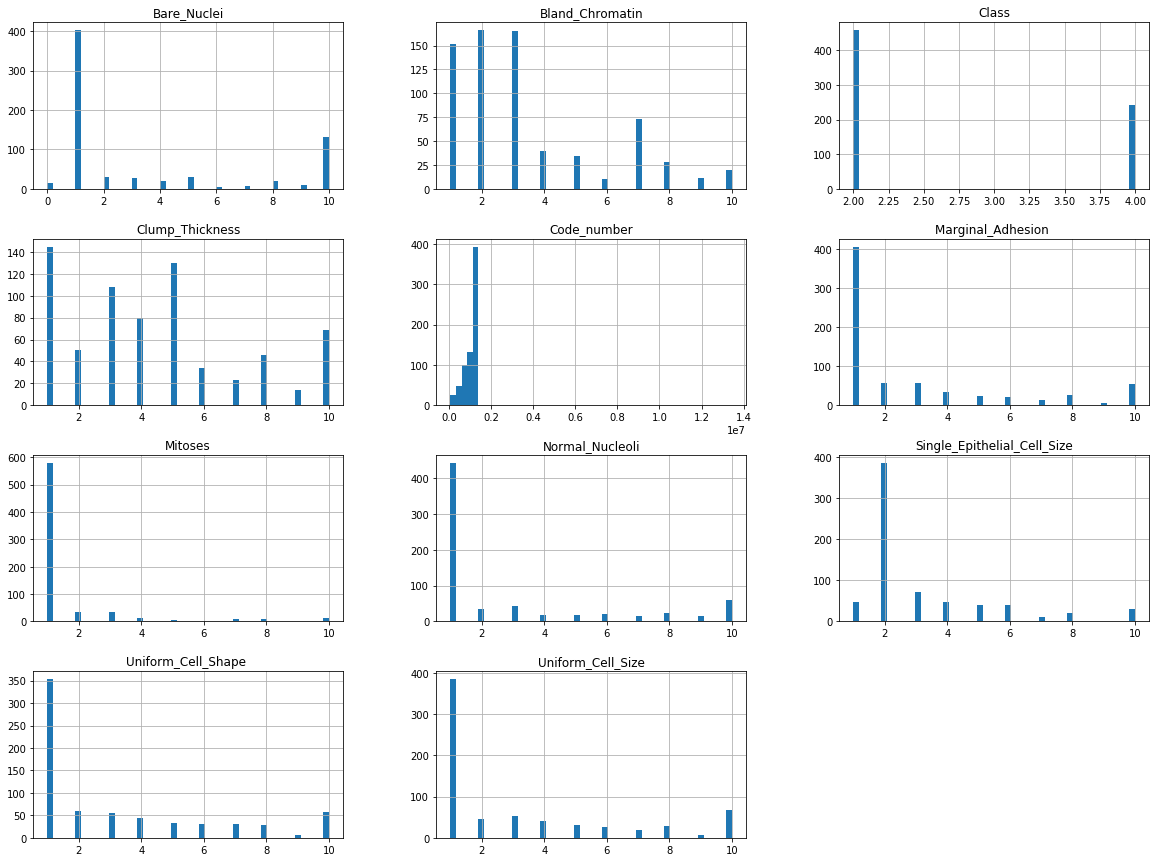

In [45]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

#### Feature Prep

In [46]:
df.columns

Index(['Code_number', 'Clump_Thickness', 'Uniform_Cell_Size',
       'Uniform_Cell_Shape ', 'Marginal_Adhesion ',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [47]:
df.shape

(699, 11)

In [49]:
df.iloc[:,0:10].head()

Code_number  Clump_Thickness  Uniform_Cell_Size  Uniform_Cell_Shape   \
0      1000025                5                  1                    1   
1      1002945                5                  4                    4   
2      1015425                3                  1                    1   
3      1016277                6                  8                    8   
4      1017023                4                  1                    1   

   Marginal_Adhesion   Single_Epithelial_Cell_Size  Bare_Nuclei  \
0                   1                            2            1   
1                   5                            7           10   
2                   1                            2            2   
3                   1                            3            4   
4                   3                            2            1   

   Bland_Chromatin  Normal_Nucleoli  Mitoses  
0                3                1        1  
1                3                2        1  
2                3                1        1  
3                3                7        1  
4                3                1        1

In [50]:
# Select Features
Xfeatures = df.iloc[:,0:10]
Ylabels = df['Class']

### Scale Our Dataset

In [51]:
from sklearn.preprocessing import MinMaxScaler as Scaler

In [52]:
scaler = Scaler()
X = scaler.fit_transform(Xfeatures)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [53]:
X.shape

(699, 10)

In [54]:
names[0:10]

['Code_number',
 'Clump_Thickness',
 'Uniform_Cell_Size',
 'Uniform_Cell_Shape ',
 'Marginal_Adhesion ',
 'Single_Epithelial_Cell_Size',
 'Bare_Nuclei',
 'Bland_Chromatin',
 'Normal_Nucleoli',
 'Mitoses']

In [55]:
X = pd.DataFrame(X,columns=names[0:10])

In [62]:
X.head()

Code_number  Clump_Thickness  Uniform_Cell_Size  Uniform_Cell_Shape   \
0     0.070067         0.444444           0.000000             0.000000   
1     0.070285         0.444444           0.333333             0.333333   
2     0.071217         0.222222           0.000000             0.000000   
3     0.071281         0.555556           0.777778             0.777778   
4     0.071336         0.333333           0.000000             0.000000   

   Marginal_Adhesion   Single_Epithelial_Cell_Size  Bare_Nuclei  \
0            0.000000                     0.111111          0.1   
1            0.444444                     0.666667          1.0   
2            0.000000                     0.111111          0.2   
3            0.000000                     0.222222          0.4   
4            0.222222                     0.111111          0.1   

   Bland_Chromatin  Normal_Nucleoli  Mitoses  
0         0.222222         0.000000      0.0  
1         0.222222         0.111111      0.0  
2         0.222222         0.000000      0.0  
3         0.222222         0.666667      0.0  
4         0.222222         0.000000      0.0

#### Split Dataset

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,Ylabels,test_size=0.2,random_state=42)

### Building the Models
+ Logistic Regression
+ KNN

In [64]:
# Initialize Model
logit = LogisticRegression()

In [65]:
# Fit Data
logit.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
# Check Accuracy
print("Accuracy Score: ",logit.score(X_test,y_test))

Accuracy Score:  0.9714285714285714


In [67]:
# Predict A Sample
X_test.values[0]

array([0.0845272 , 0.        , 0.        , 0.11111111, 0.        ,
       0.22222222, 0.        , 0.        , 0.        , 0.        ])

In [68]:
# Benign = 2
logit.predict(np.array(X_test.values[0].reshape(1,-1)))

array([2])

In [71]:
# Malignant value 15
logit.predict(np.array(X_test.values[15].reshape(1,-1)))

array([4])

### Interpreting Models
+ Shap
+ LIME
+ Eli5

#### SHAP explainers
+ TreeExplainer :: XGBoost/LightGBM/CatBoost/scikit-learn models
        - shap.TreeExplainer(model)
+ DeepExplainer:: For Deep learning models eg (TensorFlow/Keras models)
        - shap.DeepExplainer(model, background/sample)
+ GradientExplainer:: Deep learning models eg (TensorFlow/Keras/PyTorch models)
        - shap.GradientExplainer((model.layers[7].input, model.layers[-1].output),map2layer(X, 7),local_smoothing=0 # std dev of smoothing noise)
+ KernelExplainer :: Model agnostic (explains any function),slow,gives an approximation
        - shap.KernelExplainer(svm.predict_proba, X_train, link="logit")

In [72]:
# Load ML Interpreting Models
import shap

In [73]:
# Initialize JS For Plot
shap.initjs()

In [74]:
# Explainer
explainer = shap.KernelExplainer(logit.predict_proba,X_train)

Using 559 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.


In [75]:
shap_values = explainer.shap_values(X_test.iloc[0,:])

/usr/local/lib/python3.6/dist-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/usr/local/lib/python3.6/dist-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


In [76]:
# Single Sample Value
X_test.iloc[0,:]

Code_number                    0.084527
Clump_Thickness                0.000000
Uniform_Cell_Size              0.000000
Uniform_Cell_Shape             0.111111
Marginal_Adhesion              0.000000
Single_Epithelial_Cell_Size    0.222222
Bare_Nuclei                    0.000000
Bland_Chromatin                0.000000
Normal_Nucleoli                0.000000
Mitoses                        0.000000
Name: 158, dtype: float64

In [77]:
# A Single Prediction
shap.force_plot(explainer.expected_value[0],shap_values[0],X_test.iloc[0,:])

In [78]:
# Single Sample Value
X_test.iloc[15,:]

Code_number                    0.095704
Clump_Thickness                1.000000
Uniform_Cell_Size              1.000000
Uniform_Cell_Shape             0.777778
Marginal_Adhesion              1.000000
Single_Epithelial_Cell_Size    0.555556
Bare_Nuclei                    0.500000
Bland_Chromatin                1.000000
Normal_Nucleoli                0.222222
Mitoses                        0.000000
Name: 569, dtype: float64

In [79]:
# A Sample Prediction for Malignant value 15
shap_values2 = explainer.shap_values(X_test.iloc[15,:])

/usr/local/lib/python3.6/dist-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/usr/local/lib/python3.6/dist-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


In [81]:
# Output for First
shap_values2[0]

array([ 0.00063103, -0.12630362, -0.11851219, -0.1112488 , -0.07368691,
       -0.02134188, -0.07039628, -0.1057174 , -0.01011316,  0.00140893])

In [85]:
# Output for Second
shap_values2[1]

array([-0.00063103,  0.12630362,  0.11851219,  0.1112488 ,  0.07368691,
        0.02134188,  0.07039628,  0.1057174 ,  0.01011316, -0.00140893])

In [87]:
explainer.expected_value[0]

0.6413166017953295

In [88]:
# A Single Prediction
shap.force_plot(explainer.expected_value[0],shap_values2[0],X_test.iloc[15,:])

In [89]:
# A Single Prediction
shap.force_plot(explainer.expected_value[1],shap_values2[1],X_test.iloc[15,:])

#### Narrative
+ Normal base value =.3587
+ The sum of the red and the blue = output 0.99
+ All the features in red are pushing the prediction from the base value to the prediction value

In [112]:
# Shap Values
shap_values_all = explainer.shap_values(X_test)

  0%|          | 0/140 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/usr/local/lib/python3.6/dist-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
  1%|          | 1/140 [00:18<42:02, 18.15s/it]/usr/local/lib/python3.6/dist-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprec

In [113]:
# Force Plot  All Prediction of Entire Test
shap.force_plot(explainer.expected_value[0],shap_values_all[0],X_test)


#### Narrative
+ Red :: Features that push the prediction to the base line
+ Blue :: Features that pull the prediction lower from the base line      
+ NB:: You can check for individual features and compare each feature with the other

### Summary of All Effect of All Features
+ Using shap.summary_plot()

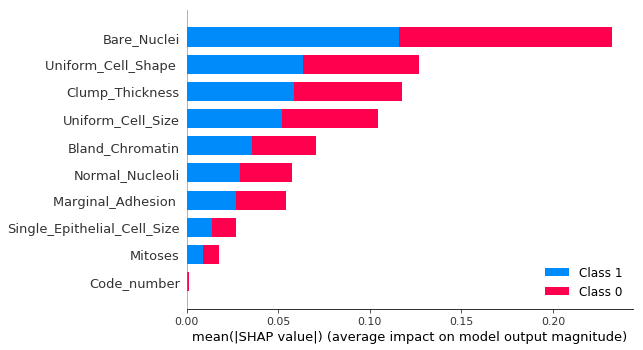

In [114]:
shap.summary_plot(shap_values_all,X_test)

#### Narrative
+ The features are arranged based on order of impact
+ Bare Nuclei contributes more followed by uniform cell shape

### Dependency Plot
+ Shows the effect a single feature has on the prediction
+ How much the prediction depends on a particular feature
+ shap.dependence_plot(indexoffeature,matrix_shap_values,dataset_matrix)

In [115]:
df.head()

Code_number  Clump_Thickness  Uniform_Cell_Size  Uniform_Cell_Shape   \
0      1000025                5                  1                    1   
1      1002945                5                  4                    4   
2      1015425                3                  1                    1   
3      1016277                6                  8                    8   
4      1017023                4                  1                    1   

   Marginal_Adhesion   Single_Epithelial_Cell_Size  Bare_Nuclei  \
0                   1                            2            1   
1                   5                            7           10   
2                   1                            2            2   
3                   1                            3            4   
4                   3                            2            1   

   Bland_Chromatin  Normal_Nucleoli  Mitoses  Class  
0                3                1        1      2  
1                3                2        1      2  
2                3                1        1      2  
3                3                7        1      2  
4                3                1        1      2

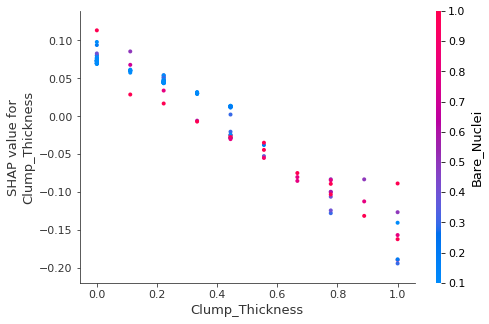

In [121]:
# Dependence Plot
shap.dependence_plot(1,shap_values_all[0],X_test)

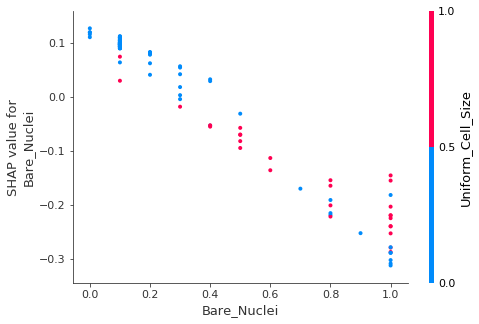

In [120]:
# Bare Nuclei
shap.dependence_plot("Bare_Nuclei",shap_values_all[0],X_test)

In [ ]:
# SHAP
# (Shapley Additive Explanation)
# sum(features) = prediction_exp -predict for base value

#### Using LIME(Local Interpretable Model Agnostic Explainer)
+ Data
+ Model
+ Class Names/Feature Names
+ Prediction Function

In [93]:
# Load our pkgs
import lime
import lime.lime_tabular

In [94]:
Ylabels.unique()

array([2, 4])

In [97]:
class_names = ['Benign','Malignant']

In [98]:
feature_names = ['Code_number', 'Clump_Thickness', 'Uniform_Cell_Size',
       'Uniform_Cell_Shape ', 'Marginal_Adhesion ',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses']

In [99]:
# Create our Explainer ,a Tabular Explainer since it is a tabular data
explainer1 =lime.lime_tabular.LimeTabularExplainer(X_train.values,feature_names=feature_names,class_names=class_names,discretize_continuous=True)

In [100]:
# Sample We Predicted 
X_test.iloc[0]

Code_number                    0.084527
Clump_Thickness                0.000000
Uniform_Cell_Size              0.000000
Uniform_Cell_Shape             0.111111
Marginal_Adhesion              0.000000
Single_Epithelial_Cell_Size    0.222222
Bare_Nuclei                    0.000000
Bland_Chromatin                0.000000
Normal_Nucleoli                0.000000
Mitoses                        0.000000
Name: 158, dtype: float64

In [103]:
# The Explainer Instance
exp1 = explainer1.explain_instance(X_test.iloc[0],logit.predict_proba,num_features=10,top_labels=1)

In [104]:
# Show in notebook
exp1.show_in_notebook(show_table=True,show_all=False)


In [105]:
# The Explainer Instance
exp2 = explainer1.explain_instance(X_test.iloc[15],logit.predict_proba,num_features=10,top_labels=1)

In [106]:
# Show in notebook
exp2.show_in_notebook(show_table=True,show_all=False)


### Using Eli5
+ Explain Like  I am 5

In [107]:
import eli5

In [108]:
# Showing the Weight for our model
eli5.show_weights(logit,top=10)

In [109]:
# Clearly Define Feature Names
eli5.show_weights(logit,feature_names =feature_names,target_names=class_names,top=10)

#### Narrative

    + Now it shows the feature names alongside their weight
    + How each feature contribute to influence the prediction
    + Bias means an intercept
    + Bias is the intercept where our line intercepts the y-axis for (linear regression). In ML we can call intercepts bias.
    + Bias offsets all predictions that we make.



In [110]:
# Show Explaination For A Single Prediction
eli5.show_prediction(logit,X_test.iloc[0],feature_names=feature_names,target_names=class_names)

In [111]:
eli5.show_prediction(logit,X_test.iloc[15],feature_names=feature_names,target_names=class_names)

#### Conclusion
+ Each of the various libraries has their own method of interpreting the model
+ Each was able to explain why our selected prediction was non-DM

In [ ]:
### Thanks 
## Jesus Saves @JCharisTech
## Jesse E.Agbe(JCharis)
## J-Secur1ty